## Exercise 4

Loading dataset and convert score to numeric:

In [9]:
import pandas as pd
from IPython.core.display import display

dishes = pd.read_csv('dishes.csv', sep=';')
dishes.loc[:, "Score"] = pd.to_numeric(dishes["Score"], errors='coerce')
display(dishes.tail())

,UserName,Dish,Score
895,torbjbak,Kentucky Fried Chicken,3
896,torbjbak,Lutefisk,1
897,torbjbak,Coq au vin,3
898,torbjbak,Ratatouille,4
899,torbjbak,Moules frites,4


Finding mean scores:

In [10]:
mean = dishes.groupby(['Dish']).mean()
display(mean)
labels = mean.index.values
values = mean['Score'].values

,Score
Dish,
Bacalao,3.681818
Chicken Curry,4.220000
Chicken Tikka Masala,4.400000
Chili Con Carne,3.820000
Coq au vin,4.000000
Kebab,3.500000
Kentucky Fried Chicken,2.437500
Lutefisk,2.957447
MacDonalds Cheeseburger,2.265306


Displaying mean scores:

Text(0, 0.5, 'Mean score')

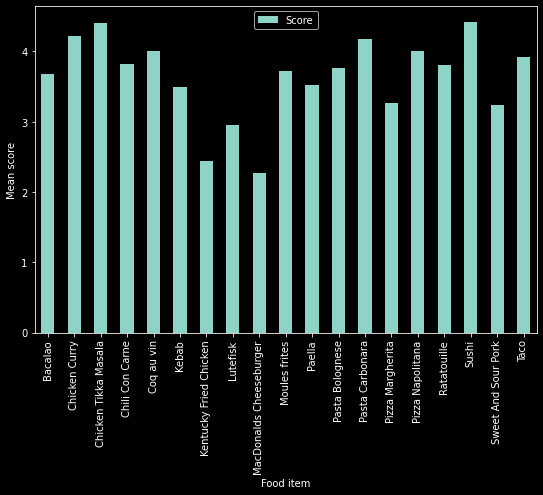

In [22]:
import matplotlib.pyplot as plt

mean.plot(kind='bar', figsize=(9, 6))
plt.xlabel("Food item")
plt.ylabel("Mean score")